In [9]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [10]:
# Load the dataset
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

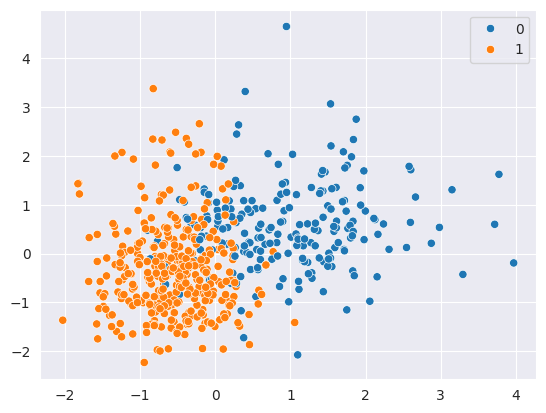

In [11]:
# Standardize data
data_pca = StandardScaler().fit_transform(cancer_data.data)
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
pca.fit_transform(data_pca)
# Data visualization
pc1 = data_pca[:, 0]
pc2 = data_pca[:, 1]
sns.scatterplot(x=pc1, y=pc2, hue=cancer_data.target)
plt.show()

In [12]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(cancer_data.data,
                                                    cancer_data.target,
                                                    test_size=0.3,
                                                    random_state=109)

In [13]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))


# Stop condition
def has_converged(X, y, w):
    predictions = np.sign(np.dot(X, w)).flatten()  # Make predictions for all X
    return np.array_equal(predictions, y)  # Compare predictions with true labels


# Perceptron algorithm
def perceptron(X, y, eta, w_init):
    w = [w_init]
    N = X.shape[0]
    mis_points = []  # set of miss position points
    max_count = 10000
    count = 0
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[mix_id[i], :]  # Access row
            yi = y[mix_id[i]]  # Direct access to the 1D array
            count += 1
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + eta * yi * xi.reshape(-1, 1)
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return w, mis_points

In [14]:
# Initialize weights and learning rate
d = cancer_data.data.shape[1]
w_init = np.random.randn(d, 1)
eta = 0.05

# Train the perceptron
w, m = perceptron(x_train, y_train, eta, w_init)
print(w[-1])
# Predict results
y_predict = h(w[-1], x_test.T).T

[[-0.16645097]
 [-0.56557052]
 [-0.46006008]
 [ 0.87807918]
 [ 0.49838261]
 [ 0.94714257]
 [-1.50574875]
 [-1.21381922]
 [-0.15018747]
 [-1.50999019]
 [ 0.1581913 ]
 [-0.30845833]
 [-0.66392003]
 [-0.07071813]
 [-0.26808086]
 [ 1.36343856]
 [-0.58766108]
 [-0.48401533]
 [ 0.85093949]
 [ 0.60669629]
 [ 0.86170989]
 [-0.4063699 ]
 [ 0.18211714]
 [ 0.14093306]
 [-1.201444  ]
 [-0.97495158]
 [-0.28360509]
 [-0.25213319]
 [ 1.20437048]
 [ 0.38240277]]


In [15]:
# Print the accuracy, recall, precision score
print(f'Accuracy score: {accuracy_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test, y_predict)}')
print(f'Precision score: {precision_score(y_test, y_predict)}')

Accuracy score: 0.631578947368421
Recall score: 1.0
Precision score: 0.631578947368421


In [16]:
# Logistic Regression approach
logistic_regression = LogisticRegression(max_iter=3000)
# Train model
logistic_regression.fit(x_train, y_train)
# Predict results
y_predict_logistic = logistic_regression.predict(x_test)
# Print the accuracy, recall, precision score
print(f'Accuracy score: {accuracy_score(y_test, y_predict_logistic)}')
print(f'Recall score: {recall_score(y_test, y_predict_logistic)}')
print(f'Precision score: {precision_score(y_test, y_predict_logistic)}')

Accuracy score: 0.9707602339181286
Recall score: 0.9722222222222222
Precision score: 0.9813084112149533


**Nhận xét:**
- Accuracy: Mô hình Logistic Regression có độ chính xác cao hơn rất so với mô hình Perceptron. Điều này cho thấy Logistic Regression có khả năng phân loại tổng thể tốt hơn đáng kể so với Perceptron.
- Perceptron có độ đo recall hoàn hảo, cho thấy nó nhận diện tất cả các trường hợp thuộc lớp positive mà không bỏ sót. Mặc dù Logistic Regression cũng có độ hồi đáp cao, nhưng vẫn còn một số trường hợp dương tính bị bỏ sót.
- Logistic Regression có độ đo precision tốt hơn, nghĩa là khi nó dự đoán một đối tượng là positive, khả năng đúng cao hơn. Ngược lại, Perceptron có độ chính xác dự đoán thấp hơn, cho thấy rằng khi nó dự đoán positive, nó thường có xu hướng nhầm lẫn hơn.


